In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
os.getcwd()

'C:\\Users\\Nikita\\Downloads\\bias_data_final'

In [5]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 'stop_and_search.ipynb']

In [6]:
stop_and_search_df = pd.DataFrame()

In [7]:
for f in os.listdir(os.getcwd()):
    if "ipynb" not in f:
        print(f)
        for file in os.listdir(f):
            
            if "stop-and-search" in file:
                df = pd.read_csv(os.path.join(os.getcwd(), f, file))
                stop_and_search_df = stop_and_search_df.append(df, ignore_index=True)
        

2019-01
2019-02
2019-03
2019-04
2019-05
2019-06
2019-07
2019-08
2019-09
2019-10
2019-11
2019-12
2020-01
2020-02
2020-03
2020-04
2020-05
2020-06
2020-07
2020-08
2020-09
2020-10
2020-11
2020-12
2021-01
2021-02


In [8]:
stop_and_search_df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2019-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Person search,2019-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Person search,2019-01-01T00:30:00+00:00,NaN,NaN,51.350977,-2.979701,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False
3,Person search,2019-01-01T01:35:00+00:00,NaN,NaN,51.471129,-2.589816,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False
4,Person search,2019-01-01T01:35:00+00:00,NaN,NaN,51.471129,-2.589816,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False


In [9]:
stop_and_search_df.count()

Type                                        1334373
Date                                        1334373
Part of a policing operation                 941134
Policing operation                                0
Latitude                                    1101274
Longitude                                   1101274
Gender                                      1240462
Age range                                   1178963
Self-defined ethnicity                      1279965
Officer-defined ethnicity                   1230136
Legislation                                 1277794
Object of search                            1250173
Outcome                                     1305271
Outcome linked to object of search           382353
Removal of more than just outer clothing     529694
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
stop_and_search_df.drop(['Policing operation', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [12]:
stop_and_search_df.head()

,Type,Date,Part of a policing operation,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2019-01-01T00:00:00+00:00,NaN,Male,18-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Person search,2019-01-01T00:00:00+00:00,NaN,Male,10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Person search,2019-01-01T00:30:00+00:00,NaN,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False
3,Person search,2019-01-01T01:35:00+00:00,NaN,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False
4,Person search,2019-01-01T01:35:00+00:00,NaN,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False


In [17]:
stop_and_search_df[['year', 'month', 'time']] = stop_and_search_df['Date'].str.split('-', 2, expand=True)

In [18]:
stop_and_search_df.head()

,Type,Date,Part of a policing operation,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,year,month,time
0,Person search,2019-01-01T00:00:00+00:00,NaN,Male,18-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,01,01T00:00:00+00:00
1,Person search,2019-01-01T00:00:00+00:00,NaN,Male,10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,01,01T00:00:00+00:00
2,Person search,2019-01-01T00:30:00+00:00,NaN,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,2019,01,01T00:30:00+00:00
3,Person search,2019-01-01T01:35:00+00:00,NaN,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False,2019,01,01T01:35:00+00:00
4,Person search,2019-01-01T01:35:00+00:00,NaN,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False,2019,01,01T01:35:00+00:00


In [19]:
stop_and_search_df['Self-defined ethnicity'].value_counts()

White - English/Welsh/Scottish/Northern Irish/British                                   535744
Other ethnic group - Not stated                                                         216098
White - Any other White background                                                      104448
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background     91892
Black/African/Caribbean/Black British - African                                          69444
Asian/Asian British - Any other Asian background                                         58287
Black/African/Caribbean/Black British - Caribbean                                        46820
Asian/Asian British - Pakistani                                                          39476
Asian/Asian British - Bangladeshi                                                        26564
Other ethnic group - Any other ethnic group                                              20935
Mixed/Multiple ethnic groups - Any other Mixed/Mul

In [20]:
# unique_vals = stop_and_search_df['Self-defined ethnicity'].unique()
# stop_and_search_df['Self-defined ethnicity'].replace(to_replace=unique_vals,
#            value= list(range(len(unique_vals))),
#            inplace=True)

In [21]:
stop_and_search_df['Gender'].value_counts()

Male      1127560
Female     110580
Other        2322
Name: Gender, dtype: int64

In [22]:
# unique_vals = stop_and_search_df['Gender'].unique()
# stop_and_search_df['Gender'].replace(to_replace=unique_vals,
#            value= list(range(len(unique_vals))),
#            inplace=True)

In [23]:
stop_and_search_df.head()

,Type,Date,Part of a policing operation,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,year,month,time
0,Person search,2019-01-01T00:00:00+00:00,NaN,Male,18-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,01,01T00:00:00+00:00
1,Person search,2019-01-01T00:00:00+00:00,NaN,Male,10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,01,01T00:00:00+00:00
2,Person search,2019-01-01T00:30:00+00:00,NaN,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,2019,01,01T00:30:00+00:00
3,Person search,2019-01-01T01:35:00+00:00,NaN,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False,2019,01,01T01:35:00+00:00
4,Person search,2019-01-01T01:35:00+00:00,NaN,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False,2019,01,01T01:35:00+00:00


In [24]:
#sns.jointplot("Self-defined ethnicity", "Gender", data=stop_and_search_df, kind='reg');

In [25]:
stop_and_search_df.groupby(["Type", "Gender"])['Self-defined ethnicity'].agg('count')

Type                       Gender
Person and Vehicle search  Female     21106
                           Male      261888
                           Other        192
Person search              Female     86440
                           Male      843656
                           Other       1167
Vehicle search             Female       126
                           Male        1596
                           Other          1
Name: Self-defined ethnicity, dtype: int64

In [26]:
df = stop_and_search_df.groupby(["Type", "Gender"])['Self-defined ethnicity'].agg('count').to_frame(name = 'count').reset_index()

In [27]:
df.head()

,Type,Gender,count
0,Person and Vehicle search,Female,21106
1,Person and Vehicle search,Male,261888
2,Person and Vehicle search,Other,192
3,Person search,Female,86440
4,Person search,Male,843656


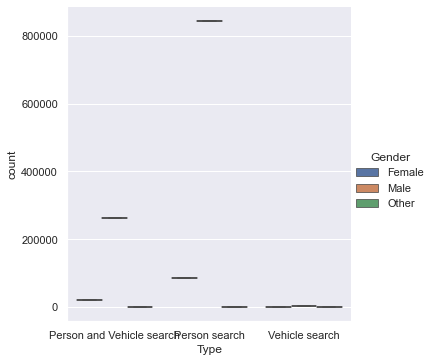

In [66]:
sns.catplot(x="Type", y="count", hue="Gender", data=df, kind="box")

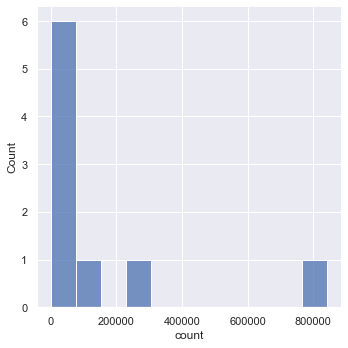

In [67]:
sns.displot(df['count'])

<AxesSubplot:xlabel='count', ylabel='Count'>

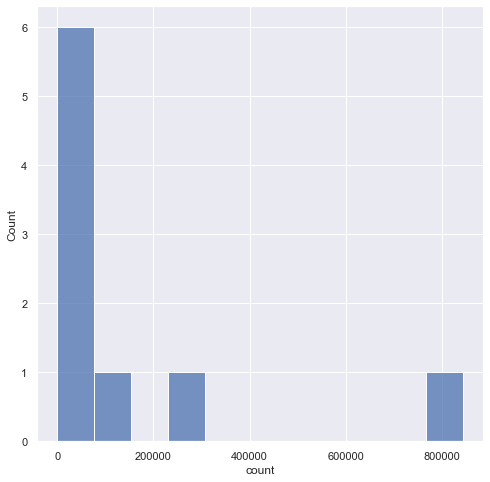

In [68]:
sns.histplot(df['count'])

(array([6., 1., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([1.000000e+00, 8.436650e+04, 1.687320e+05, 2.530975e+05,
        3.374630e+05, 4.218285e+05, 5.061940e+05, 5.905595e+05,
        6.749250e+05, 7.592905e+05, 8.436560e+05]),
 <BarContainer object of 10 artists>)

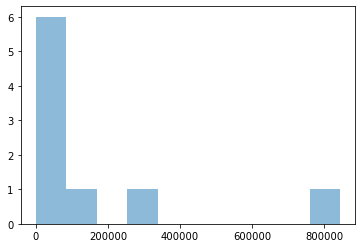

In [31]:
plt.hist(df['count'], alpha=0.5)

<AxesSubplot:xlabel='count', ylabel='Density'>

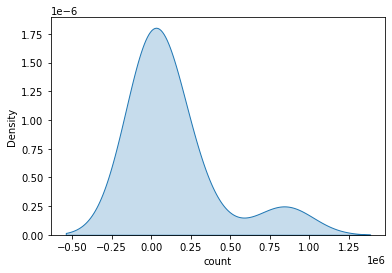

In [32]:
sns.kdeplot(df['count'], shade=True)

In [34]:
stop_and_search_df.groupby(["Type", "Gender", "year"])[['Self-defined ethnicity', 'Officer-defined ethnicity']].agg('count')

Self-defined ethnicity  \
Type                      Gender year                           
Person and Vehicle search Female 2019                    7425   
                                 2020                   11708   
                                 2021                    1973   
                          Male   2019                   99522   
                                 2020                  139672   
                                 2021                   22694   
                          Other  2019                      29   
                                 2020                     136   
                                 2021                      27   
Person search             Female 2019                   34152   
                                 2020                   45271   
                                 2021                    7017   
                          Male   2019                  350041   
                                 2020                  428942   
                                 2021                   64673   
                          Other  2019                     359   
                                 2020                     717   
                                 2021                      91   
Vehicle search            Female 2019                      43   
                                 2020                      51   
                                 2021                      32   
                          Male   2019                     624   
                                 2020                     826   
                                 2021                     146   
                          Other  2019                       0   
                                 2020                       1   
                                 2021                       0   

                                       Officer-defined ethnicity  
Type                      Gender year                             
Person and Vehicle search Female 2019                       7424  
                                 2020                      11919  
                                 2021                       1992  
                          Male   2019                      99336  
                                 2020                     141376  
                                 2021                      22861  
                          Other  2019                         28  
                                 2020                        133  
                                 2021                         25  
Person search             Female 2019                      33588  
                                 2020                      44735  
                                 2021                       6927  
                          Male   2019                     344900  
                                 2020                     423469  
                                 2021                      63875  
                          Other  2019                        345  
                                 2020                        701  
                                 2021                         87  
Vehicle search            Female 2019                         43  
                                 2020                         54  
                                 2021                         33  
                          Male   2019                        641  
                                 2020                        848  
                                 2021                        147  
                          Other  2019                          0  
                                 2020                          0  
                                 2021                          0

In [70]:
df1 = stop_and_search_df.groupby(["Type", "Gender", "year"])['Self-defined ethnicity'].agg('count').to_frame(name = 'count').reset_index()

In [71]:
df1.head()

,Type,Gender,year,count
0,Person and Vehicle search,Female,2019,7425
1,Person and Vehicle search,Female,2020,11708
2,Person and Vehicle search,Female,2021,1973
3,Person and Vehicle search,Male,2019,99522
4,Person and Vehicle search,Male,2020,139672


<AxesSubplot:xlabel='Type', ylabel='count'>

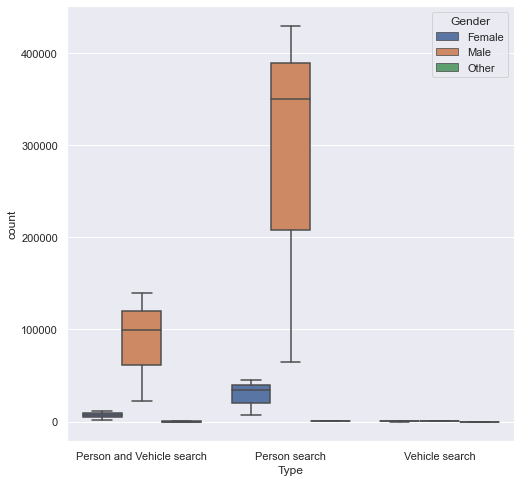

In [72]:
sns.boxplot(x="Type", y="count", hue="Gender", data=df1)

<AxesSubplot:xlabel='year', ylabel='count'>

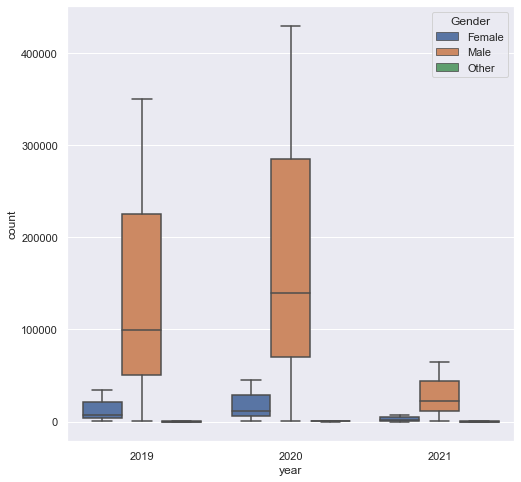

In [74]:
sns.boxplot(x="year", y="count", hue="Gender", data=df1)

In [50]:
stop_and_search_df.groupby(["Type", "Gender", "year", "Self-defined ethnicity", "Officer-defined ethnicity"])['Date'].agg('count')

Type                       Gender  year  Self-defined ethnicity                                 Officer-defined ethnicity
Person and Vehicle search  Female  2019  Asian/Asian British - Any other Asian background       Asian                        153
                                                                                                Black                          6
                                                                                                Mixed                          2
                                                                                                Other                         14
                                                                                                White                          3
                                                                                                                            ... 
Vehicle search             Male    2021  Other ethnic group - Not stated                        White   

In [51]:
df2 = stop_and_search_df.groupby(["Type", "Gender", "year", "Self-defined ethnicity", "Officer-defined ethnicity"])['Date'].agg('count').to_frame(name = 'count').reset_index()

In [52]:
df2.head()

,Type,Gender,year,Self-defined ethnicity,Officer-defined ethnicity,count
0,Person and Vehicle search,Female,2019,Asian/Asian British - Any other Asian background,Asian,153
1,Person and Vehicle search,Female,2019,Asian/Asian British - Any other Asian background,Black,6
2,Person and Vehicle search,Female,2019,Asian/Asian British - Any other Asian background,Mixed,2
3,Person and Vehicle search,Female,2019,Asian/Asian British - Any other Asian background,Other,14
4,Person and Vehicle search,Female,2019,Asian/Asian British - Any other Asian background,White,3


<AxesSubplot:xlabel='Type', ylabel='count'>

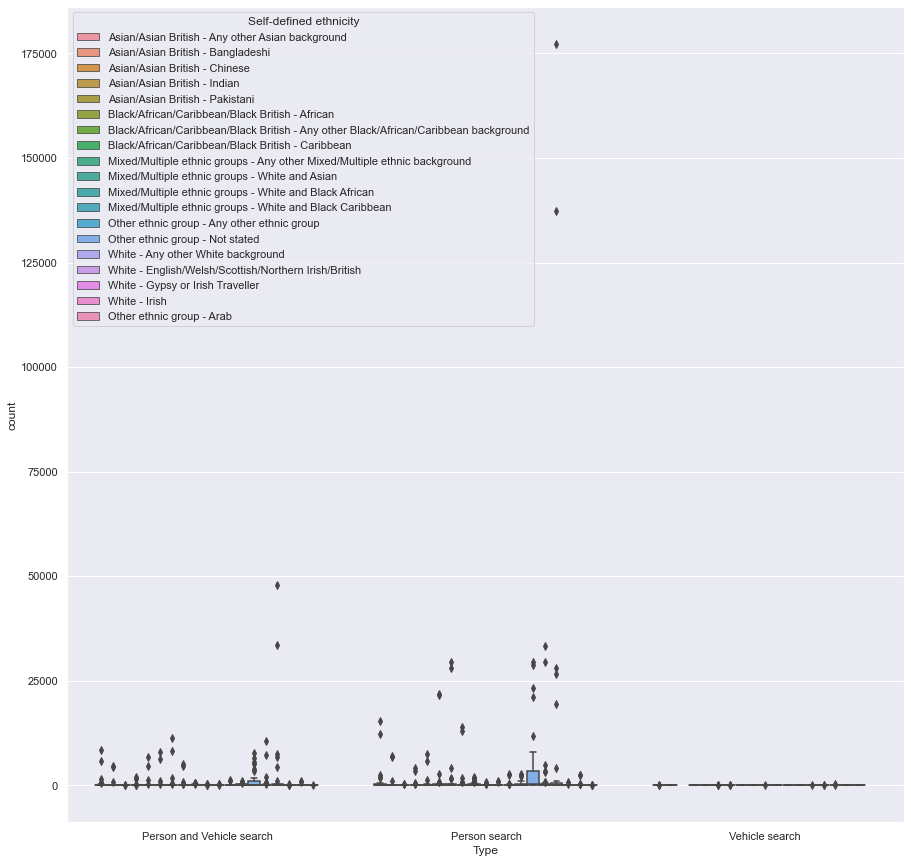

In [59]:
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(x="Type", y="count", hue="Self-defined ethnicity", data=df2)

<AxesSubplot:xlabel='Type', ylabel='count'>

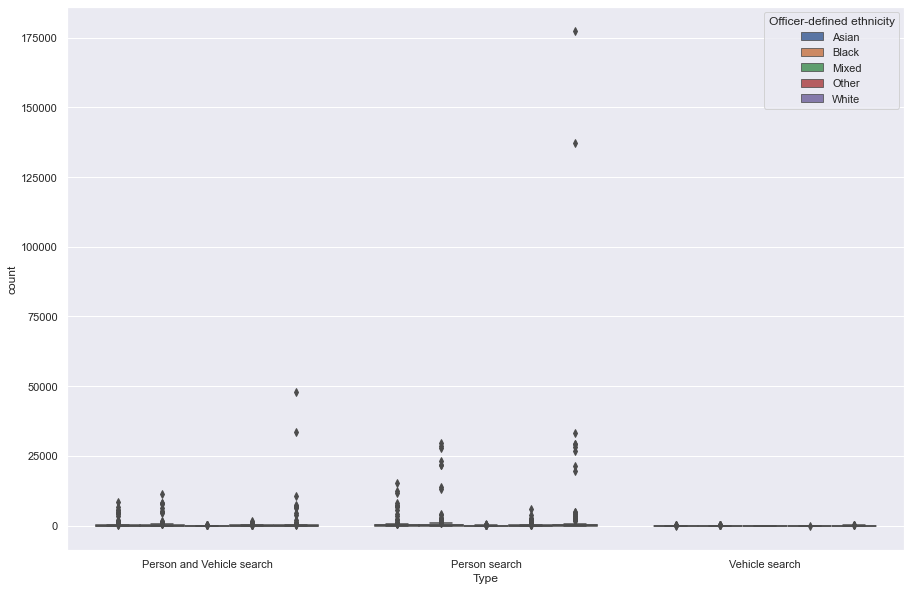

In [83]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x="Type", y="count", hue="Officer-defined ethnicity", data=df2)

<AxesSubplot:xlabel='Gender', ylabel='count'>

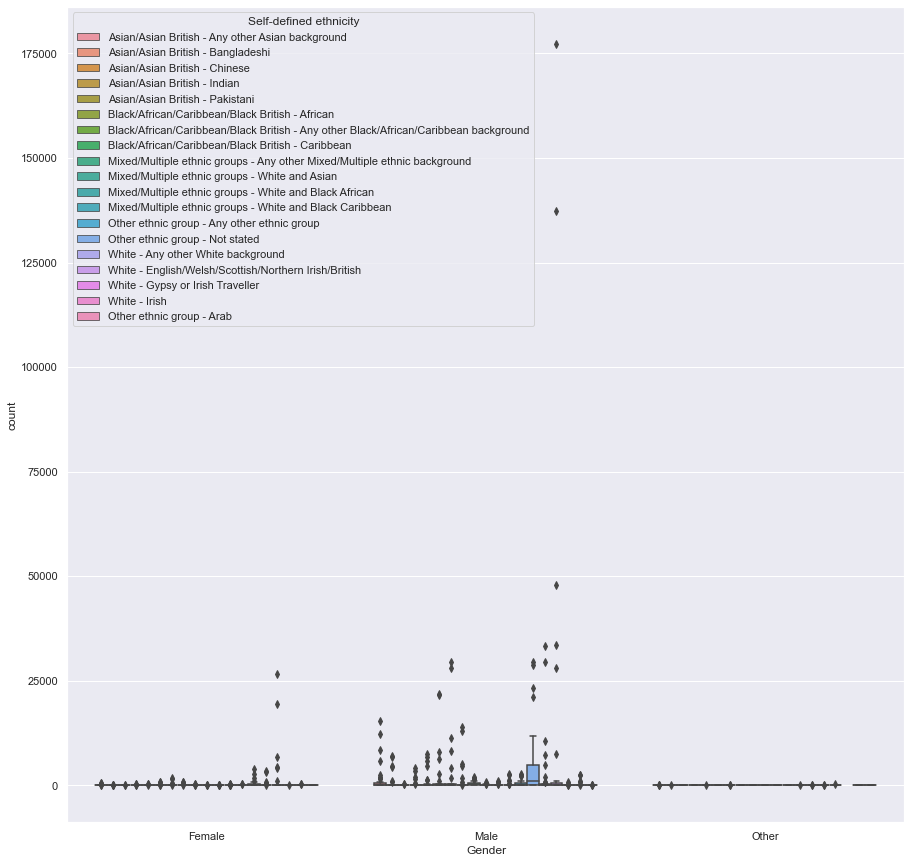

In [61]:
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(x="Gender", y="count", hue="Self-defined ethnicity", data=df2)

<AxesSubplot:xlabel='Gender', ylabel='count'>

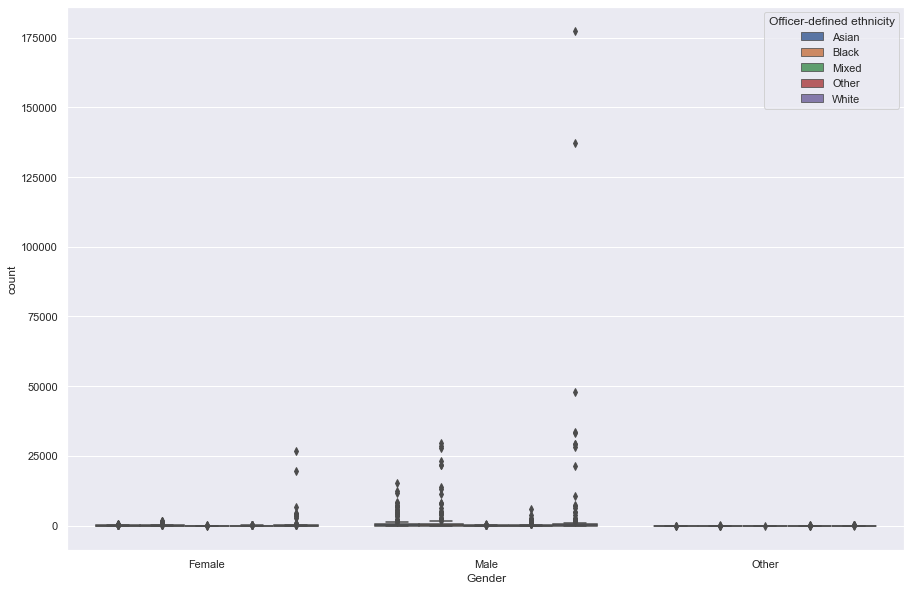

In [82]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x="Gender", y="count", hue="Officer-defined ethnicity", data=df2)

<AxesSubplot:xlabel='count', ylabel='Density'>

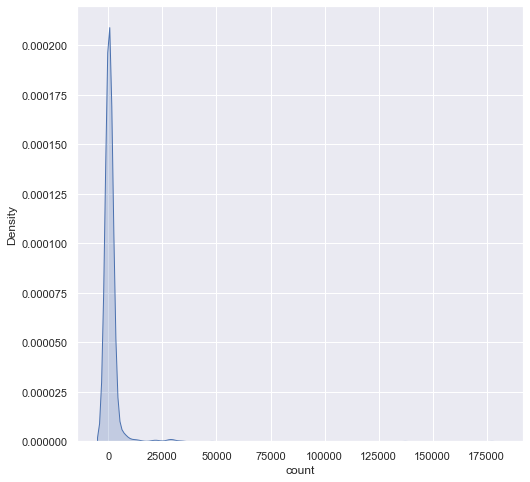

In [65]:
sns.set(rc={'figure.figsize':(8,8)})
sns.kdeplot(df2['count'], shade=True)

<AxesSubplot:xlabel='year', ylabel='count'>

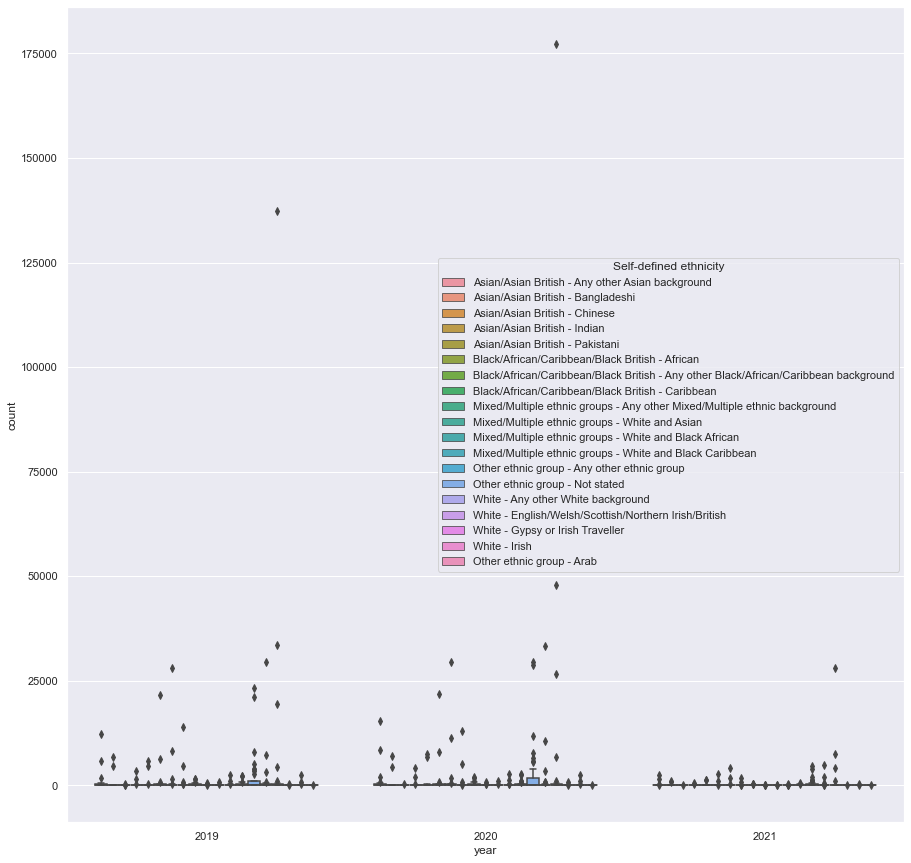

In [75]:
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(x="year", y="count", hue="Self-defined ethnicity", data=df2)

<AxesSubplot:xlabel='year', ylabel='count'>

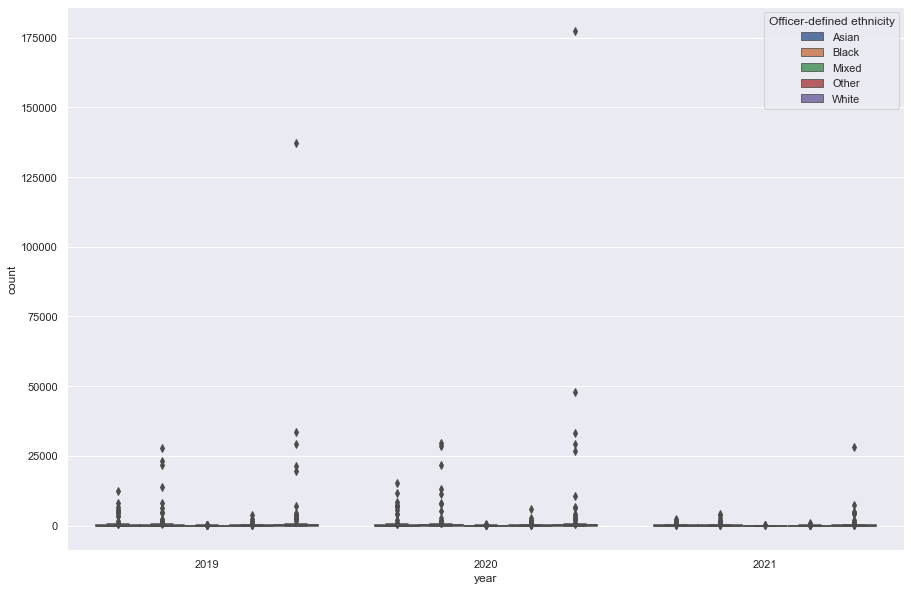

In [81]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x="year", y="count", hue="Officer-defined ethnicity", data=df2)

In [87]:
df2.dtypes

Type                         object
Gender                       object
year                         object
Self-defined ethnicity       object
Officer-defined ethnicity    object
count                         int64
dtype: object

In [92]:
df3 = df2[df2['count'] < 10000]

<AxesSubplot:xlabel='year', ylabel='count'>

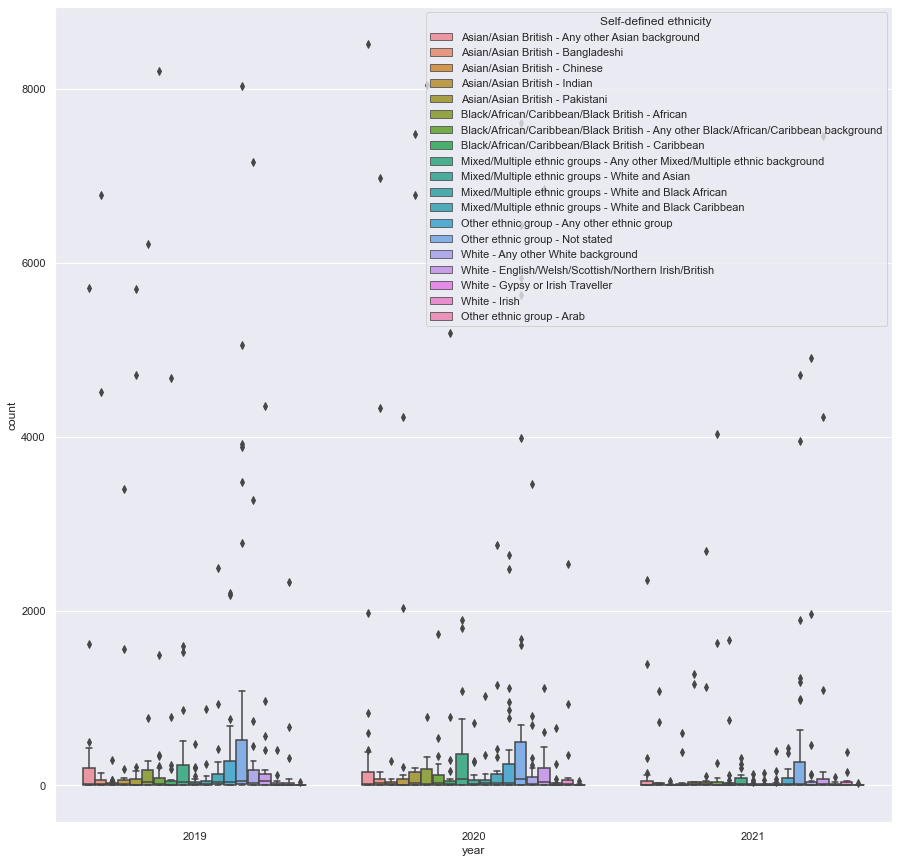

In [93]:
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(x="year", y="count", hue="Self-defined ethnicity", data=df3)

<AxesSubplot:xlabel='year', ylabel='count'>

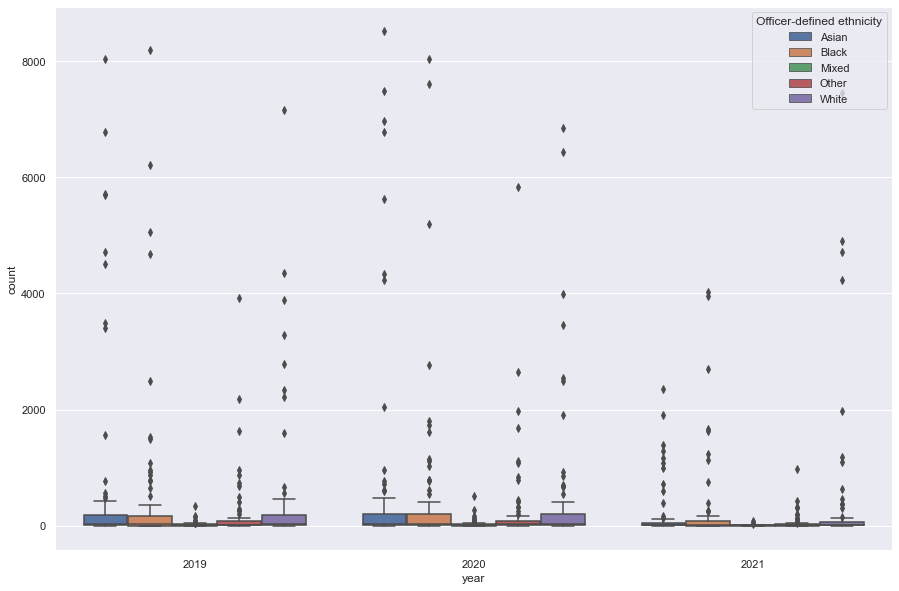

In [95]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x="year", y="count", hue="Officer-defined ethnicity", data=df3)

<AxesSubplot:xlabel='Type', ylabel='count'>

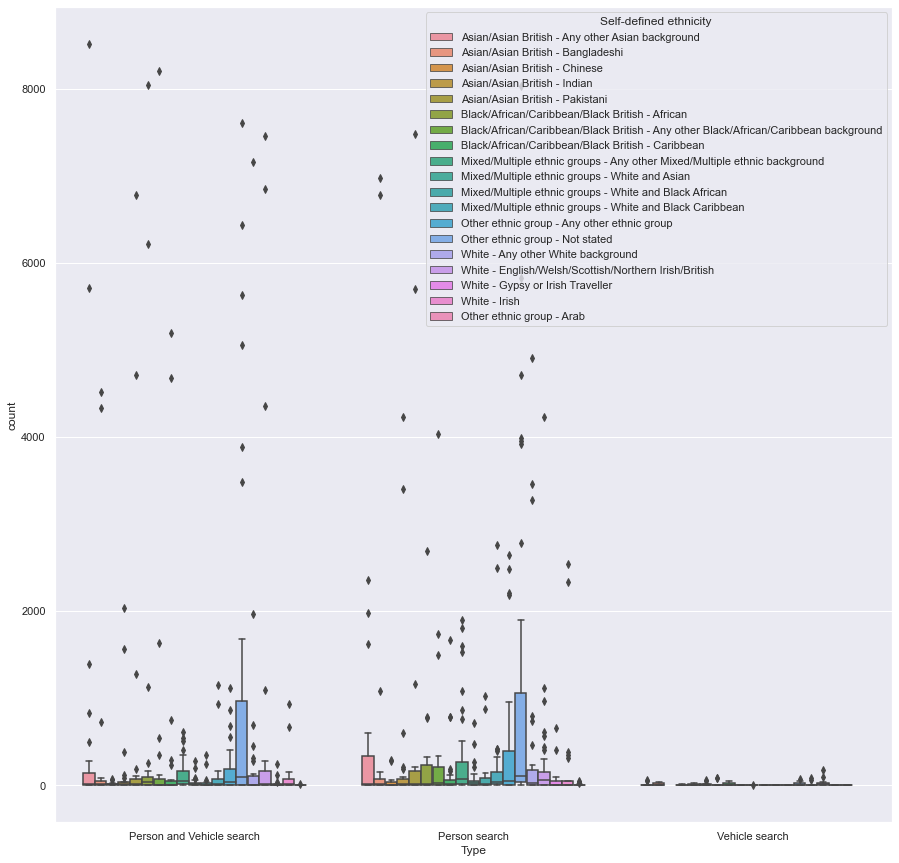

In [96]:
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(x="Type", y="count", hue="Self-defined ethnicity", data=df3)

<AxesSubplot:xlabel='Type', ylabel='count'>

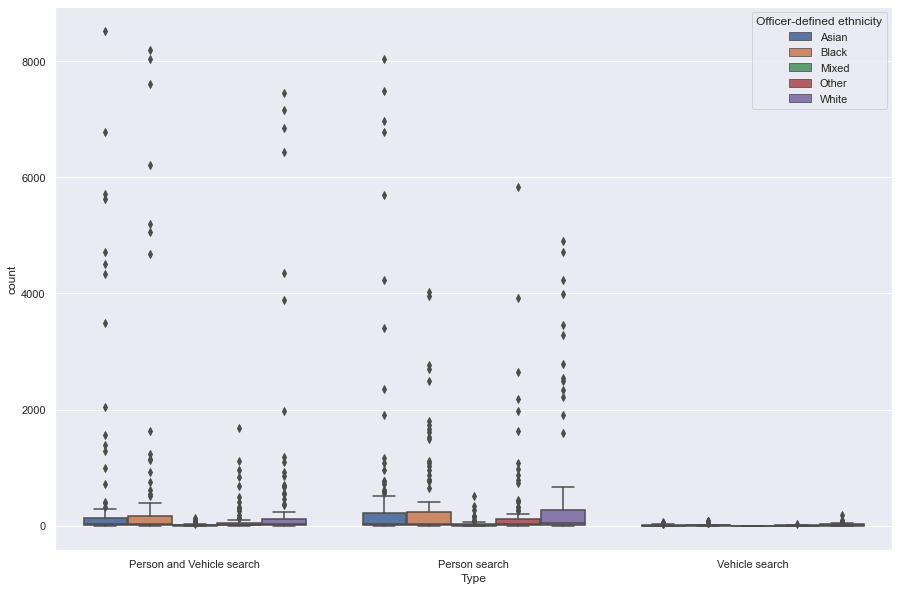

In [97]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x="Type", y="count", hue="Officer-defined ethnicity", data=df3)